In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import necessary libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve



In [ ]:
p = Path().cwd()
q = p/"drive/MyDrive/Colab Notebooks/Brands"  # use p to create a path to the data 

target_dict={"Original":0,"Fake":1} # create dictionary mapping you data classes/labels to integer labels 
images = [] # create an empty list
labels = [] # create an empty list

for fldr in q.iterdir(): 
    current_label = fldr.name # get the name of the current label
    
    for subfldr in fldr.iterdir():
      current_label = subfldr.name
      
      for img in subfldr.iterdir():
        if img.is_file():  # check if the current item is a file
            img = load_img(img, color_mode = "grayscale") # load image as grayscale  
            img_array = img_to_array(img) # convert the image to an NumPy array 
            img_array_resized = smart_resize(img_array, (256, 256)) #resize the image to 256 by 256 
            images.append(img_array_resized) # add reshaped image to list of images 
            
            labels.append(target_dict[current_label]) # add label for this image to the list of labels


/usr/local/lib/python3.9/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


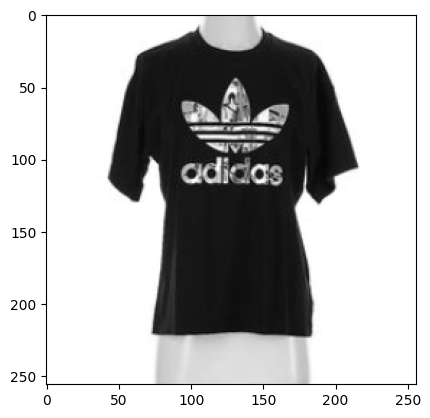

In [ ]:
plt.imshow(images[70], cmap='gray')

In [ ]:
print(labels[0])

1


In [ ]:
len(images)

6000

In [ ]:

# Making 80% split for training data
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.25, random_state=42)



In [ ]:
# Converting values to numpy array
train_images = np.array(train_images)
test_images = np.array(test_images)
val_images = np.array(val_images)


In [ ]:
# Scaling values to [0,1] interval
train_images = train_images / 255
test_images = test_images/ 255
val_images = val_images / 255


In [ ]:
#shape of the image data arrays
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)


(3600, 256, 256, 1)
(1200, 256, 256, 1)
(1200, 256, 256, 1)


In [ ]:

# flatten the images to use them as features
train_features = train_images.reshape(train_images.shape[0], -1)
val_features = val_images.reshape(val_images.shape[0], -1)
test_features = test_images.reshape(test_images.shape[0], -1)


## **SVM MODEL**

In [ ]:
#import necessary libraries
from sklearn.svm import SVC


# train the SVM model
svm = SVC(kernel='linear', C=1, random_state=42)
svm.fit(train_features, train_labels)


SVC(C=1, kernel='linear', random_state=42)

In [ ]:
# evaluate the model on validation set
val_preds = svm.predict(val_features)
val_acc = accuracy_score(val_labels, val_preds)
print("Validation accuracy:", val_acc)

# evaluate the model on test set
test_preds = svm.predict(test_features)
test_acc = accuracy_score(test_labels, test_preds)
print("Test accuracy:", test_acc)


Validation accuracy: 0.8175
Test accuracy: 0.845


In [ ]:
# calculate precision, recall, and F1 score for the predicted labels
val_precision = precision_score(val_labels, val_preds, average='weighted')
val_recall = recall_score(val_labels, val_preds, average='weighted')
val_f1 = f1_score(val_labels, val_preds, average='weighted')

# print the results
print("Validation precision:", val_precision)
print("Validation recall:", val_recall)
print("Validation F1 score:", val_f1)


Validation precision: 0.8045191900806326
Validation recall: 0.8175
Validation F1 score: 0.8100635927302098


The validation precision of 0.8045191900806326 and recall of 0.8175. means that the precision and recall are around 0.80-0.82%, which indicates that the model is able to identify positive cases (i.e., fake images) with a high degree of accuracy. The F1 score is around 0.81, which suggests that the model is able to balance precision and recall reasonably well.

In [ ]:
test_precision = precision_score(test_labels, test_preds, average='weighted')
test_recall = recall_score(test_labels, test_preds, average='weighted')
test_f1 = f1_score(test_labels, test_preds, average='weighted')
print("Test precision:", test_precision)
print("Test recall:", test_recall)
print("Test F1 score:", test_f1)


Test precision: 0.8380048076923078
Test recall: 0.845
Test F1 score: 0.8411936036550542


test precision of 0.84, which means that 84% of the predictions made by the model for the positive class were correct. The test recall is 0.85, which means that 85% of the actual positive examples in the test set were correctly identified by the model. F1 score is 0.84, which indicates that the model has a good balance of precision and recall and is performing well overall.

In [ ]:
# here we calculate the confusion matrix of the model's predictions on the test set.
cm=confusion_matrix(test_labels,test_preds)
cm

array([[937,  83],
       [103,  77]])

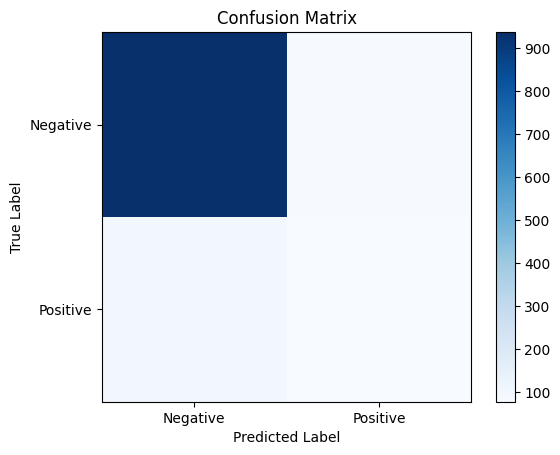

In [ ]:
# visual representation of confusion matrix of the model's predictions.
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In this case, there were 937 true negative predictions, 83 false positive predictions, 103 false negative predictions and 77 true positive predictions.



In [ ]:

# set a threshold for positive class
threshold = 0.1
# create predictions based on threshold
label_scores_forest = (label_probas_forest[:, 1] >= threshold).astype(int)
unique, counts= np.unique(label_scores_forest,return_counts=True)
result= np.column_stack((unique,counts))
print(result)

[[   0 1423]
 [   1 2177]]


In [ ]:
precisions, recalls, thresholds  = precision_recall_curve(
    train_labels, label_scores_forest)

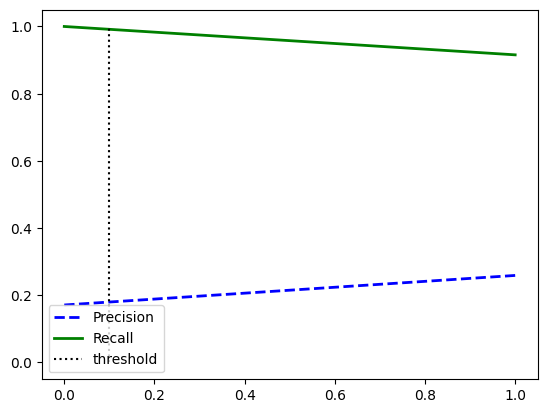

In [ ]:

# precision recall curve
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.legend()
plt.show()

The above plot shows that when threshold is set to 0.1, the precision slightly increases and recall slightly decreases.

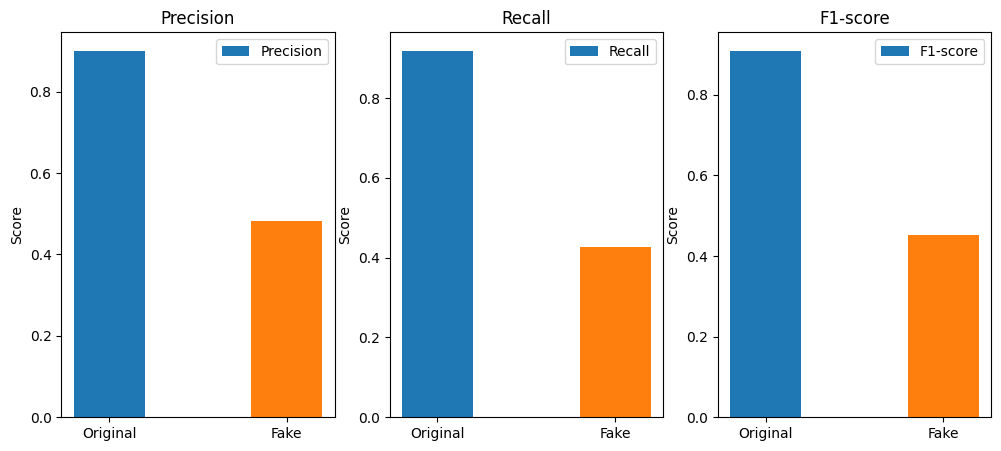

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_preds)
class_names = ['Original', 'Fake']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

The precision, recall and F1 score for original class is higher as compared to Fake class. 

In [ ]:
# Converting labels to categorical
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
val_labels = to_categorical(val_labels)


In [ ]:
model = Sequential()
initializer = tf.keras.initializers.HeUniform()
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same", input_shape=(256, 256, 1)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer,padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer=initializer))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.summary()
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

#Train the model for 20 epochs with a batch size of 25

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(val_images, val_labels), batch_size=25, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Evaluate the model on validation data
validation_loss, validation_acc = model.evaluate(val_images, val_labels)

# Print the test and validation accuracy
print('Test accuracy:', test_acc)
print('Validation accuracy:', validation_acc)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 128)     0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 128)    512       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 128)     1

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/20
144/144 [==============================] - 122s 703ms/step - loss: 0.5683 - accuracy: 0.7536 - val_loss: 1.0916 - val_accuracy: 0.5533
Epoch 2/20
144/144 [==============================] - 101s 700ms/step - loss: 0.3833 - accuracy: 0.8472 - val_loss: 0.6764 - val_accuracy: 0.7050
Epoch 3/20
144/144 [==============================] - 104s 725ms/step - loss: 0.2938 - accuracy: 0.8839 - val_loss: 0.4625 - val_accuracy: 0.8300
Epoch 4/20
144/144 [==============================] - 104s 722ms/step - loss: 0.1901 - accuracy: 0.9311 - val_loss: 0.5317 - val_accuracy: 0.8392
Epoch 5/20
144/144 [==============================] - 104s 721ms/step - loss: 0.0991 - accuracy: 0.9636 - val_loss: 0.5858 - val_accuracy: 0.8325
Epoch 6/20
144/144 [==============================] - 104s 720ms/step - loss: 0.0582 - accuracy: 0.9806 - val_loss: 0.6527 - val_accuracy: 0.8725
Epoch 7/20
144/144 [==============================] - 100s 692ms/step - loss: 0.0539 - accuracy: 0.9828 - val_loss: 0.5565 -

The model's accuracy is used as the primary metric to evaluate its performance on the validation and test datasets. The results showed that the model was able to accurately classify images of brand logos into their respective categories.
Test accuracy : 0.8675000071525574 
Validation accuracy: 0.8583333492279053 


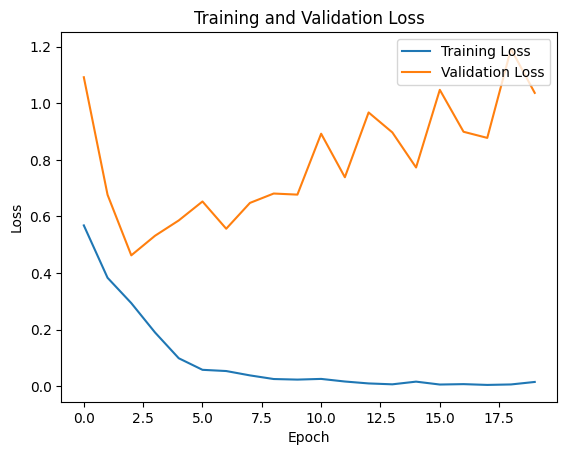

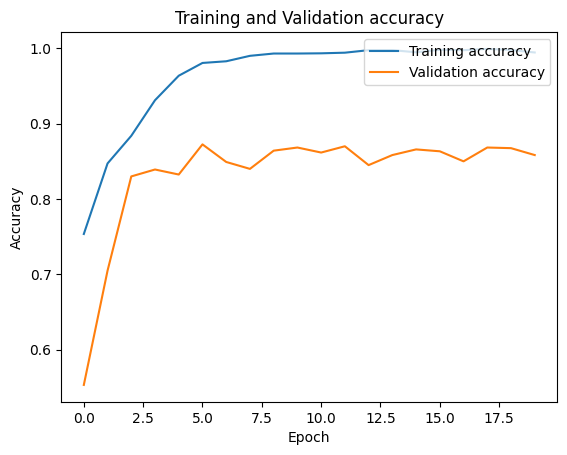

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Convert the predicted labels from one-hot encoding to integer encoding
test_pred_labels = np.argmax(model.predict(test_images), axis=1)

# Get the classification report for the test data
print(classification_report(np.argmax(test_labels, axis=1), test_pred_labels))


38/38 [==============================] - 6s 144ms/step
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1020
           1       0.57      0.47      0.52       180

    accuracy                           0.87      1200
   macro avg       0.74      0.70      0.72      1200
weighted avg       0.86      0.87      0.86      1200



The "precision" for class 0 is 0.91, which means that out of all the samples predicted as class 0 by the model, 91% of them were class 0. The "recall" for class 0 is 0.94. The "f1-score" for class 0 is 0.92. The "precision" for class 1 is 0.57, which means that out of all the samples predicted as class 1 by the model, 57% of them were actually class 1. The "recall" for class 1 is 0.47. The "f1-score" for class 1 is 0.52. The "accuracy" of the model on this dataset is 0.87.

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Convert one-hot encoded labels back to integer labels
test_labels = np.argmax(test_labels, axis=1)

# Generate the confusion matrix
pred_label = model.predict(test_images)
cm = confusion_matrix(test_labels, np.argmax(pred_label, axis=1))

print('Confusion matrix:')
print(cm)


38/38 [==============================] - 5s 145ms/step
Confusion matrix:
[[956  64]
 [ 95  85]]


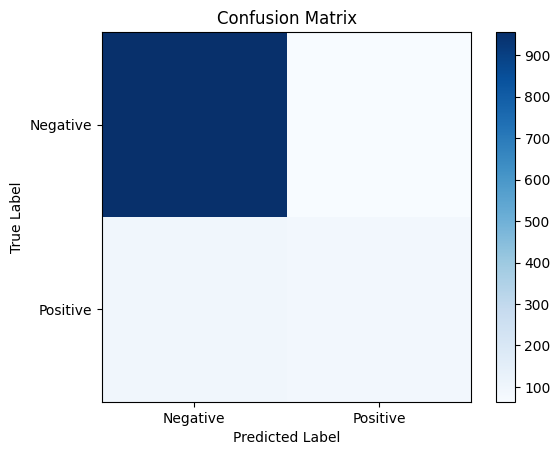

In [ ]:
# visual representation of confusion matrix of the model's predictions.
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], labels=["Negative", "Positive"])
plt.yticks([0, 1], labels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In this case, there were 956 true negative predictions, 64 false positive predictions, 95 false negative predictions and 85 true positive predictions.

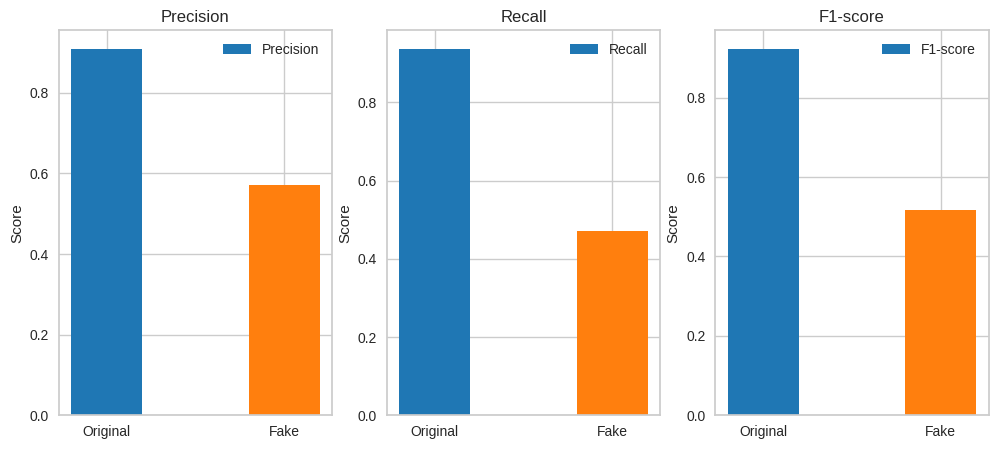

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(test_labels, test_pred_labels)
class_names = ['Original', 'Fake']
x = np.arange(len(class_names))
fig, ax = plt.subplots(ncols=3, figsize=(12, 5))
rects1 = ax[0].bar(x, precision, width=0.4, align='center', label='Precision', color=['tab:blue', 'tab:orange'])
rects2 = ax[1].bar(x, recall, width=0.4, align='center', label='Recall', color=['tab:blue', 'tab:orange'])
rects3 = ax[2].bar(x, f1_score, width=0.4, align='center', label='F1-score', color=['tab:blue', 'tab:orange'])
for i, axi in enumerate(ax):
    axi.set_xticks(x)
    axi.set_xticklabels(class_names)
    axi.set_ylabel('Score')
    axi.set_title(['Precision', 'Recall', 'F1-score'][i])
    axi.legend()

plt.show()

The precision, recall and F1 score for original class is higher as compared to Fake class. 